In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [2]:
#Reading in the dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

### EDA

In [3]:
# Step 1: Exploratory Data Analysis (EDA)
print("Dataset summary:")
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get information about the dataset (data types, missing values, etc.)
print(df.describe())  # View statistical summary of the numerical features



Dataset summary:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6       

### Distribution

In [4]:
# Define the numeric features
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


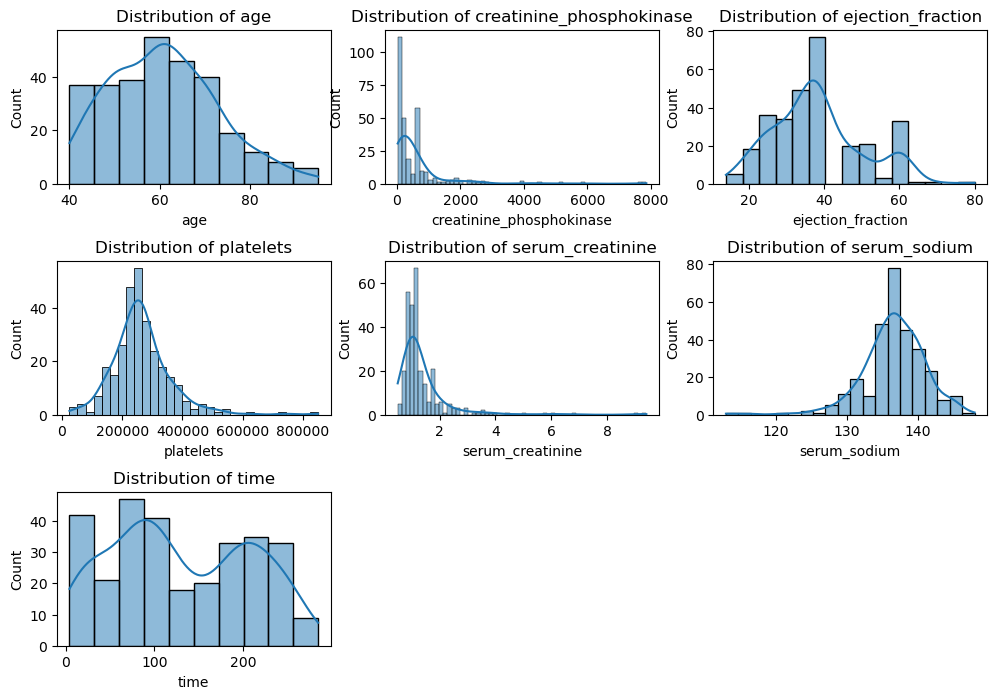

In [5]:
# Step 2: Data Visualization
#Histogram grid of numerical features
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.show()

### Count plot

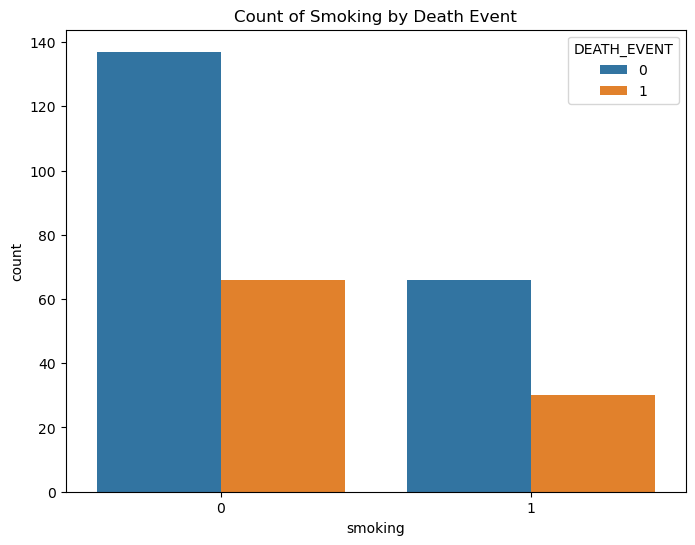

In [6]:
# Count plot of smoking by death event
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)
plt.title('Count of Smoking by Death Event')
plt.show()

### Boxplots

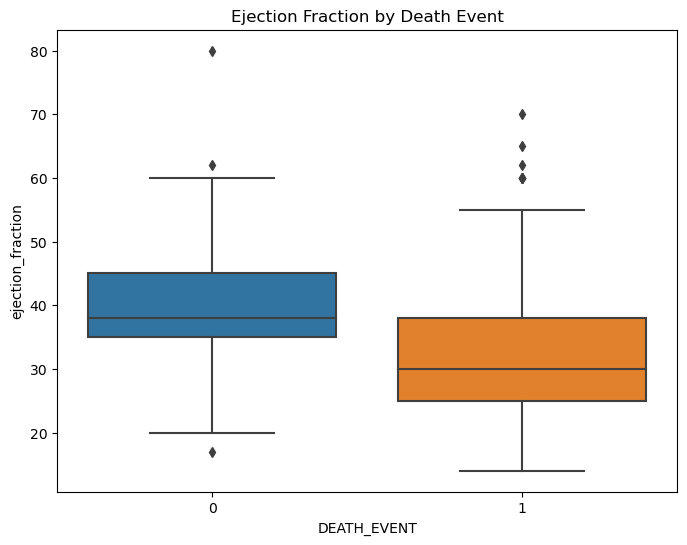

In [7]:
#Box plot of ejection fraction by death event
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.title('Ejection Fraction by Death Event')
plt.show()

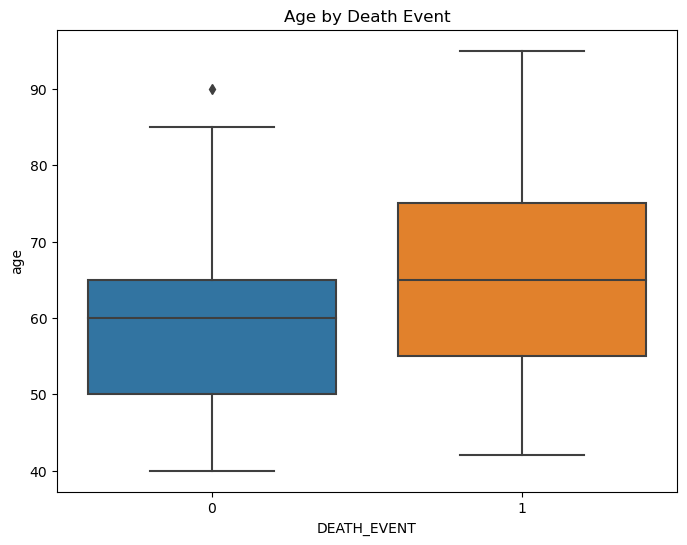

In [8]:
#Box plot of ejection fraction by death event
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age by Death Event')
plt.show()

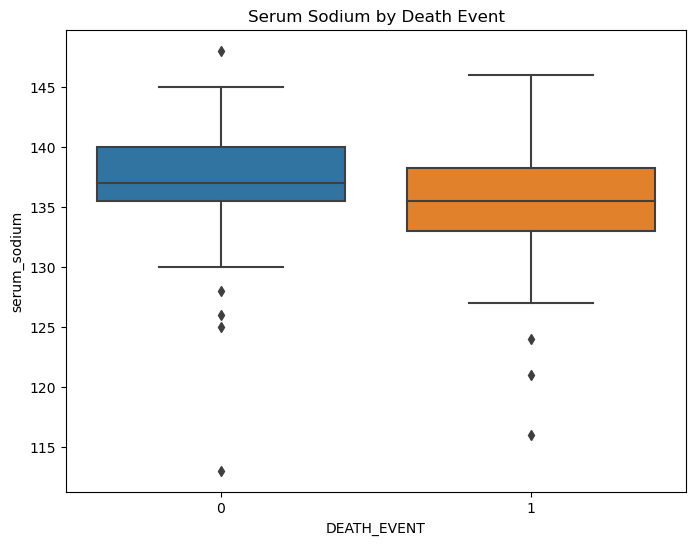

In [9]:
#Box plot of ejection fraction by death event
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df)
plt.title('Serum Sodium by Death Event')
plt.show()

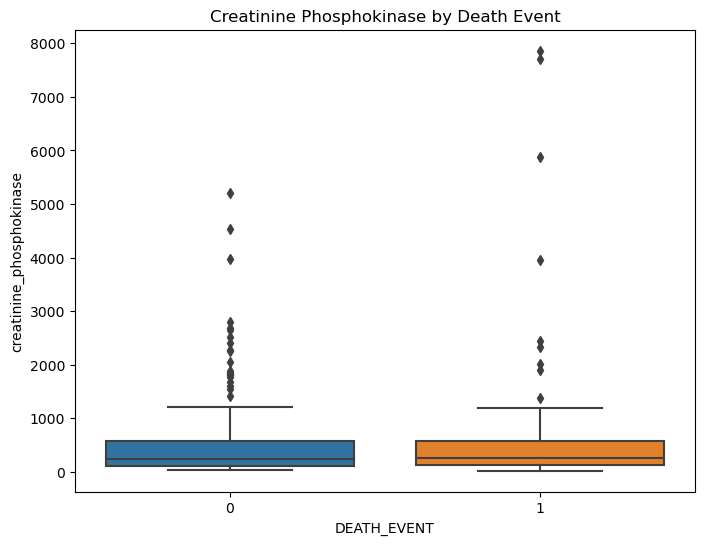

In [10]:
#Box plot of ejection fraction by death event
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=df)
plt.title('Creatinine Phosphokinase by Death Event')
plt.show()

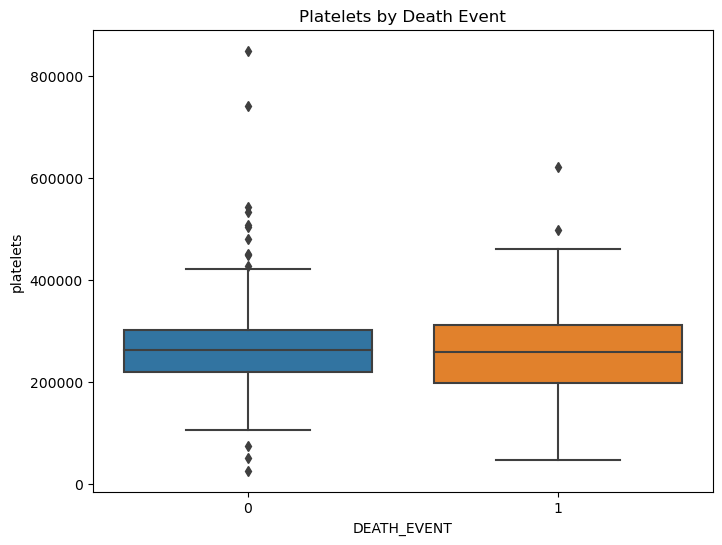

In [11]:
#Box plot of ejection fraction by death event
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='platelets', data=df)
plt.title('Platelets by Death Event')
plt.show()

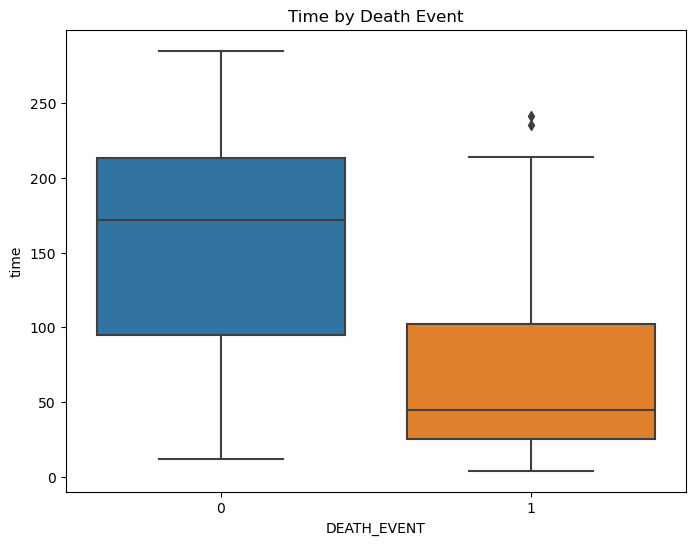

In [12]:
#Box plot of ejection fraction by death event
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='time', data=df)
plt.title('Time by Death Event')
plt.show()

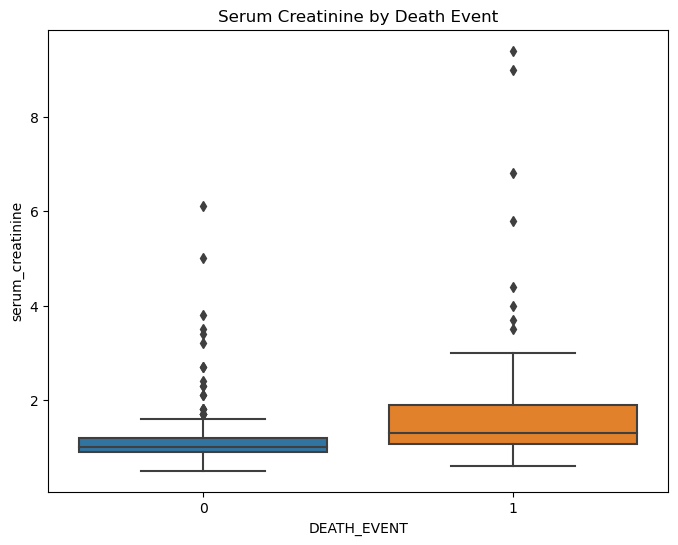

In [13]:
#Box plot of ejection fraction by death event
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine by Death Event')
plt.show()

### Correlation Heatmap

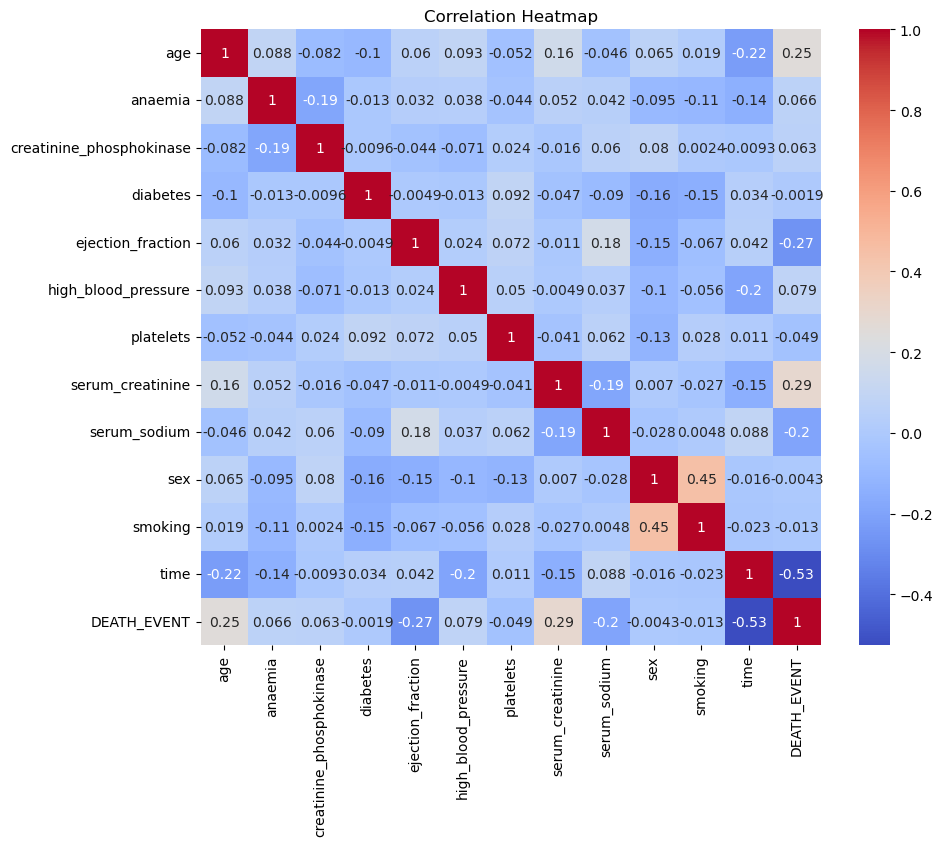

In [14]:
#Visualizing the correlation between numerical features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

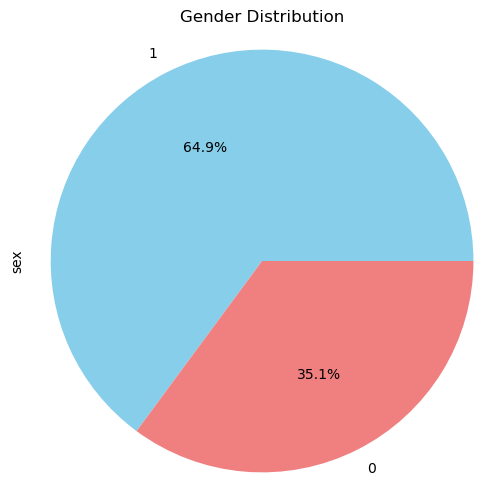

In [15]:
#Pie chart of gender distribution
plt.figure(figsize=(6, 6))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


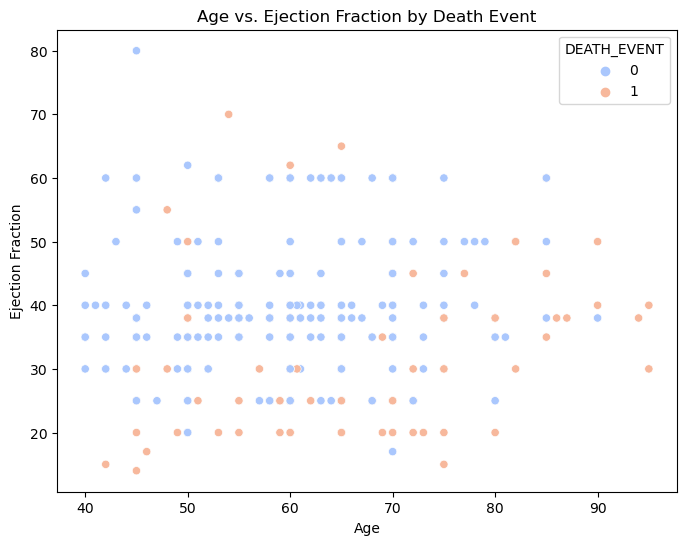

In [16]:
# Scatter plot of age versus ejection fraction
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='ejection_fraction', hue='DEATH_EVENT', palette='coolwarm')
plt.title('Age vs. Ejection Fraction by Death Event')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.show()


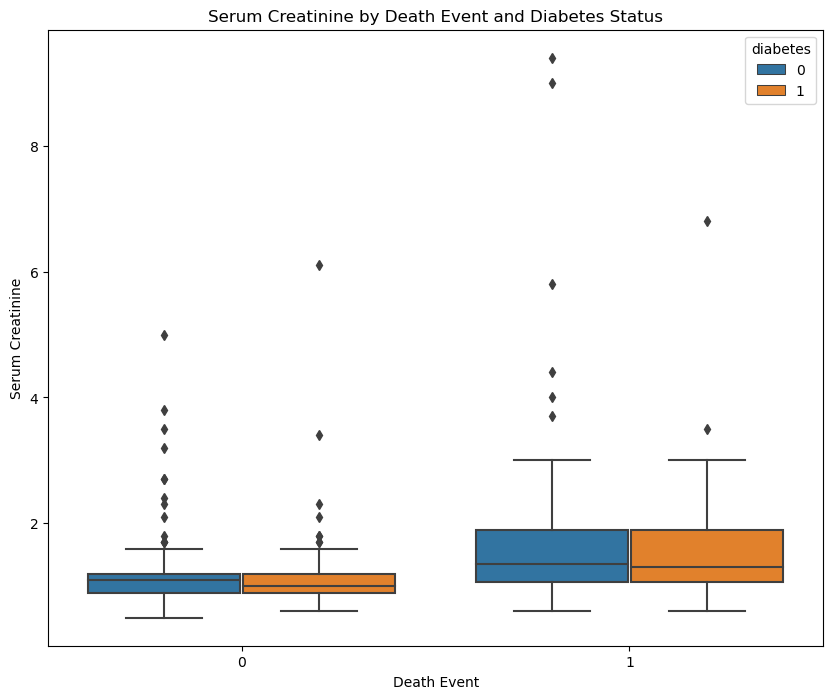

In [17]:
#Box plot of serum creatinine by death event and diabetes status
plt.figure(figsize=(10, 8))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', hue='diabetes', data=df)
plt.title('Serum Creatinine by Death Event and Diabetes Status')
plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine')
plt.show()

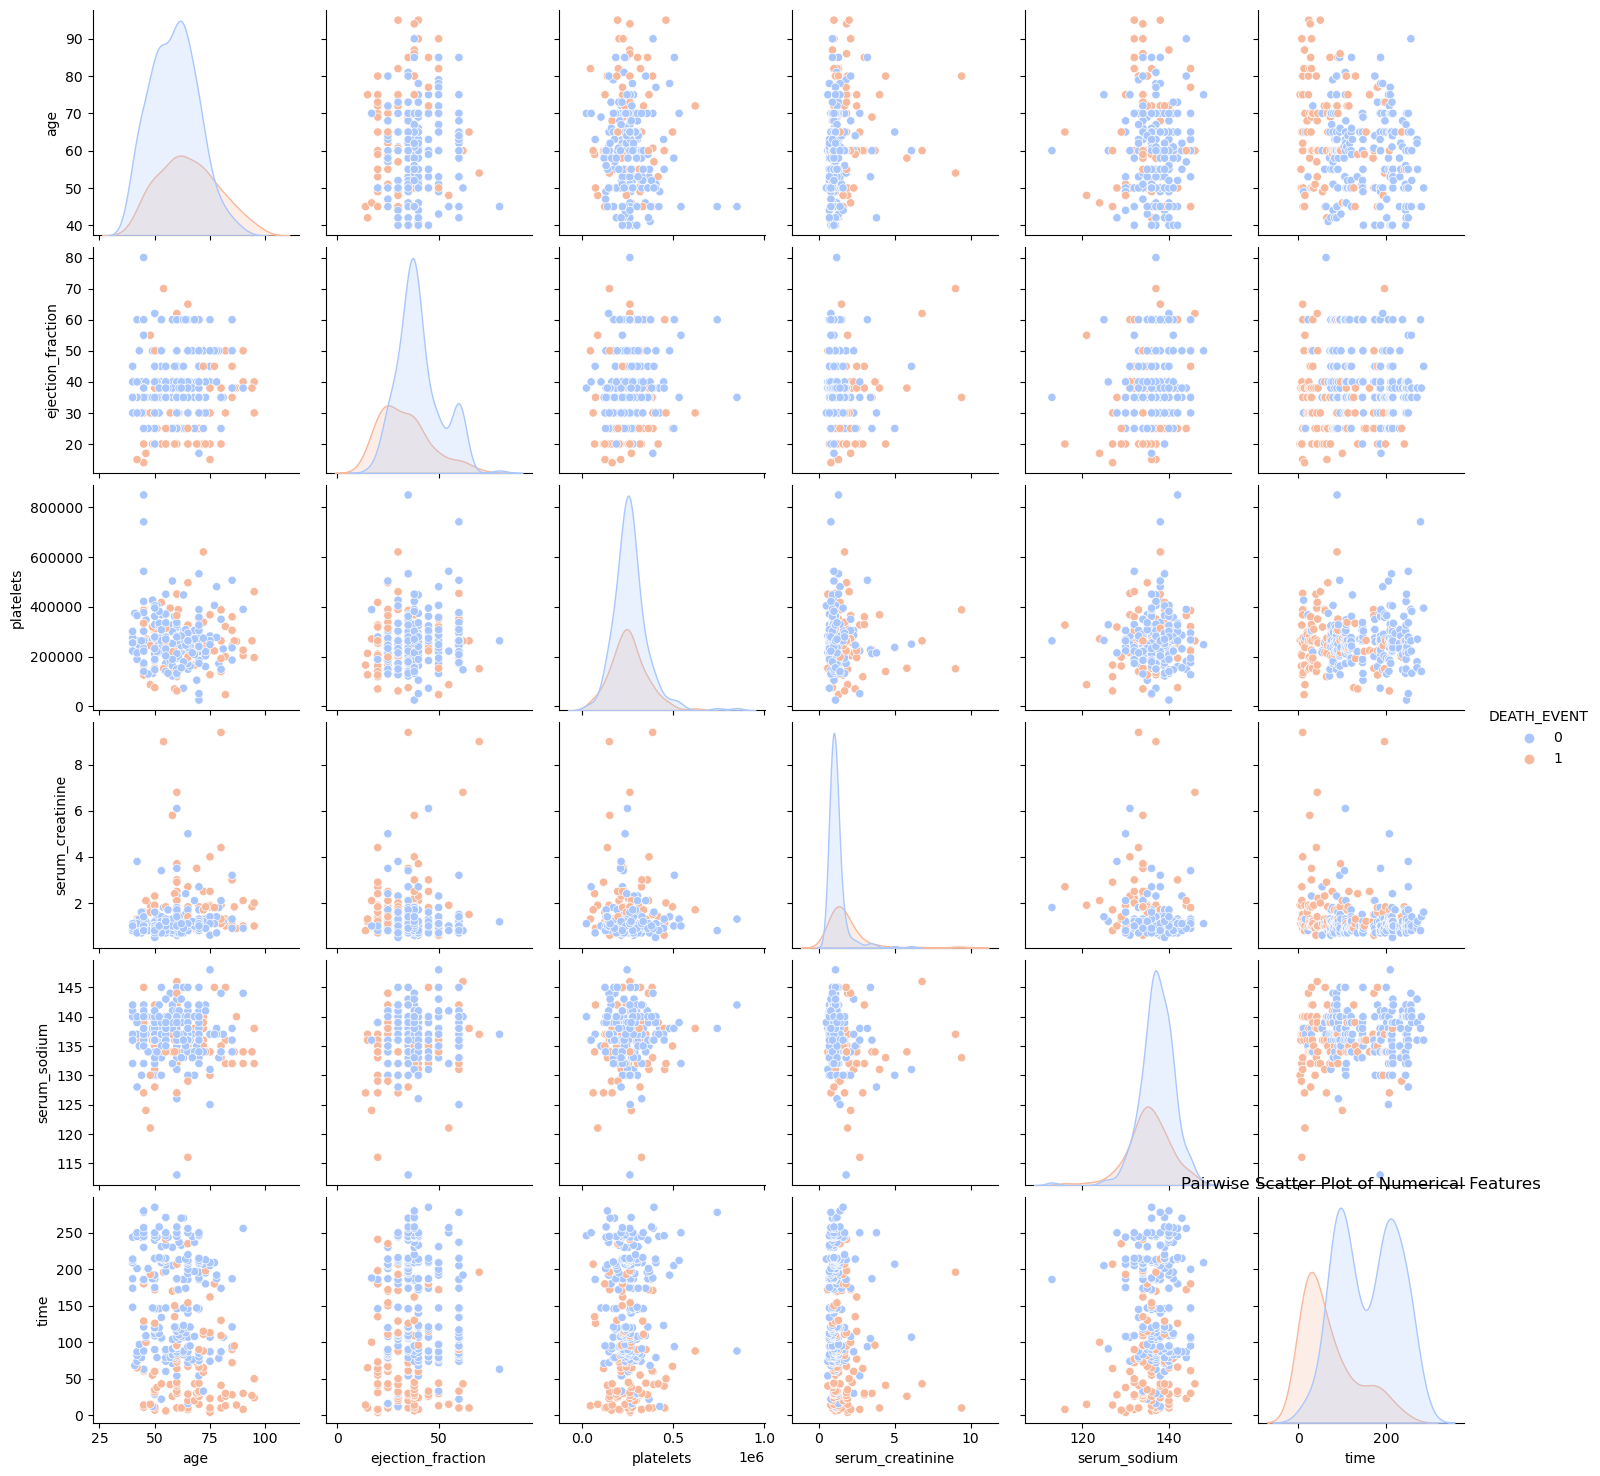

In [18]:
#Pairwise scatter plot of numerical features
sns.pairplot(df[['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']], hue='DEATH_EVENT', palette='coolwarm')
plt.title('Pairwise Scatter Plot of Numerical Features')
plt.show()


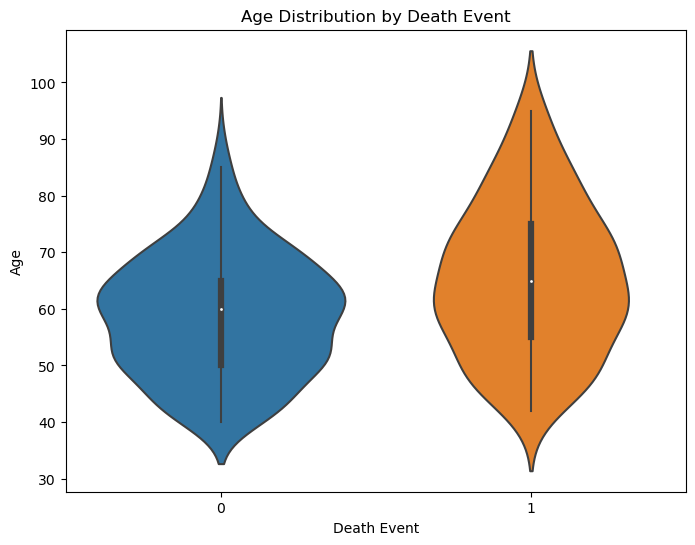

In [19]:
#Violin plot of age by death event
plt.figure(figsize=(8, 6))
sns.violinplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age Distribution by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.show()

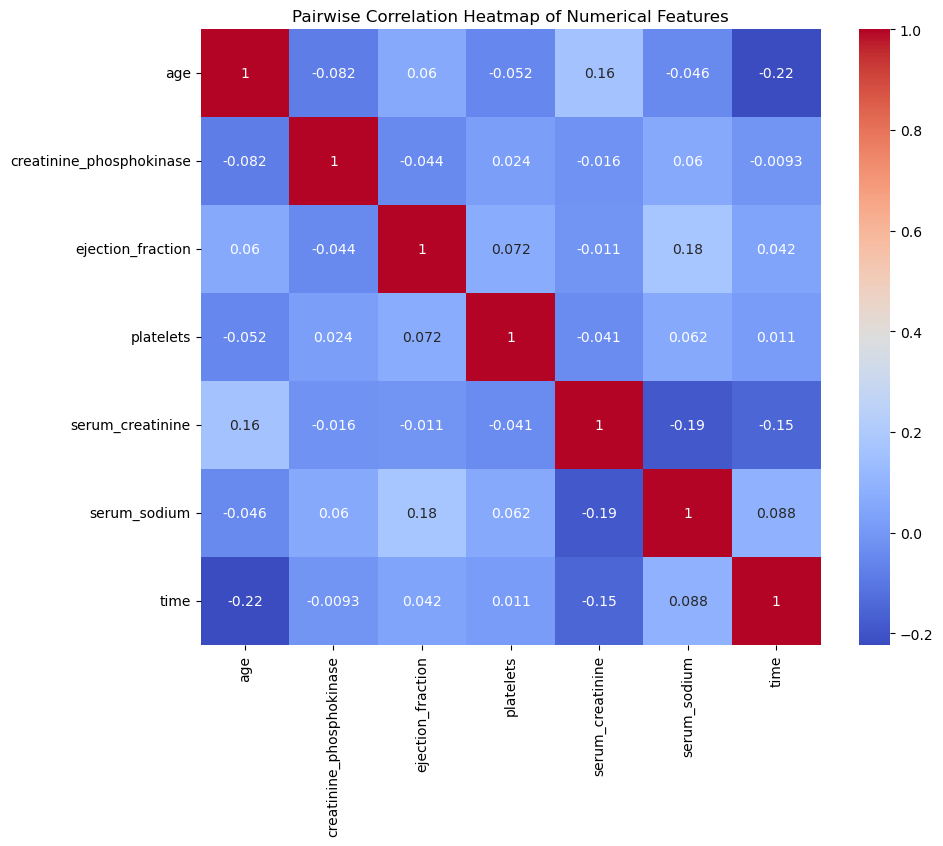

In [20]:
#Pairwise correlation heatmap of numerical features
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Heatmap of Numerical Features')
plt.show()


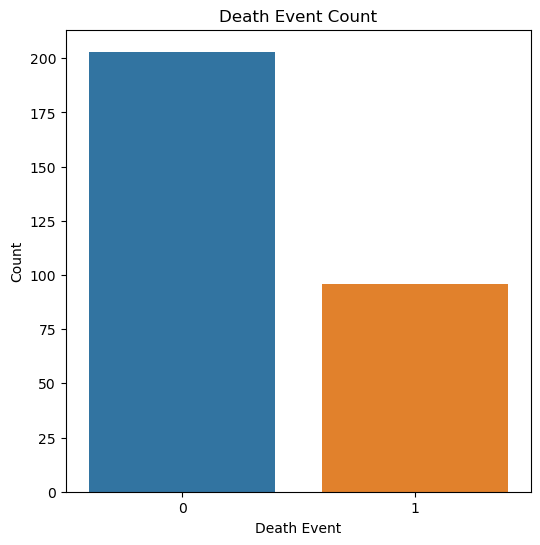

In [21]:
#  Bar plot of death event count
plt.figure(figsize=(6, 6))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Death Event Count')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.show()

In [22]:
# Step 3: Feature Engineering (if required)
# Example: Handling missing values
df = df.dropna()  # Remove rows with missing values

# Step 4: Model Training and Evaluation
# Splitting the data into training and testing sets
X = df.drop('DEATH_EVENT', axis=1)  # Features
y = df['DEATH_EVENT']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [23]:
# Model training and evaluation - Example with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)



Accuracy: 0.8
Confusion Matrix:
[[34  1]
 [11 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



In [24]:
# Step 5: Feature Importance (if applicable)
# Example: Feature importance using RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
sorted_features = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(sorted_features)


Feature Importance:
                     Feature  Importance
11                      time    0.379935
7           serum_creatinine    0.145503
4          ejection_fraction    0.116393
0                        age    0.087299
2   creatinine_phosphokinase    0.077941
6                  platelets    0.074427
8               serum_sodium    0.062456
10                   smoking    0.012421
9                        sex    0.012336
1                    anaemia    0.011773
5        high_blood_pressure    0.010279
3                   diabetes    0.009238


### Rough

In [25]:
df_eda = pd.DataFrame()

df_eda["age"] = df["age"]
df_eda["anaemia"] = np.where(df["anaemia"] < 1, "no", "yes")
df_eda["creatinine_phosphokinase"] = df["creatinine_phosphokinase"]
df_eda["diabetes"] = np.where(df["diabetes"] < 1, "no", "yes")
df_eda["ejection_fraction"] = df["ejection_fraction"]
df_eda["high_blood_pressure"] = np.where(df["high_blood_pressure"] < 1, "no", "yes")
df_eda["platelets"] = df["platelets"]
df_eda["serum_creatinine"] = df["serum_creatinine"]
df_eda["serum_sodium"] = df["serum_sodium"]
df_eda["sex"] = np.where(df["sex"] < 1, "female", "male")
df_eda["smoking"] = np.where(df["smoking"] < 1, "no", "yes")
df_eda["time"] = df["time"]
df_eda["death_event"] = np.where(df["DEATH_EVENT"] < 1, "no", "yes")

df_eda.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,no,582,no,20,yes,265000.00,1.9,130,male,no,4,yes
1,55.0,no,7861,no,38,no,263358.03,1.1,136,male,no,6,yes
2,65.0,no,146,no,20,no,162000.00,1.3,129,male,yes,7,yes
3,50.0,yes,111,no,20,no,210000.00,1.9,137,male,no,7,yes
4,65.0,yes,160,yes,20,no,327000.00,2.7,116,female,no,8,yes


In [26]:
df_eda.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


- The average value of age is **60.83**, the highest value is **95**

- The average value of creatinine_phosphokinase is **581.83**, the highest value is **7861**

- The average value of ejection_fraction is **30.08**, the highest value is **80**

- The average value of platelets is **263358**, the highest value is **850000**

- The average value of serum_creatinine is **1.39**, the highest value is **9.4**

- The average value of serum_sodium is **136.62**, the highest value is **148**

- The average value of time is **130.26**, the highest value is **285**

In [27]:
#Function which gives all the metrics of a model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

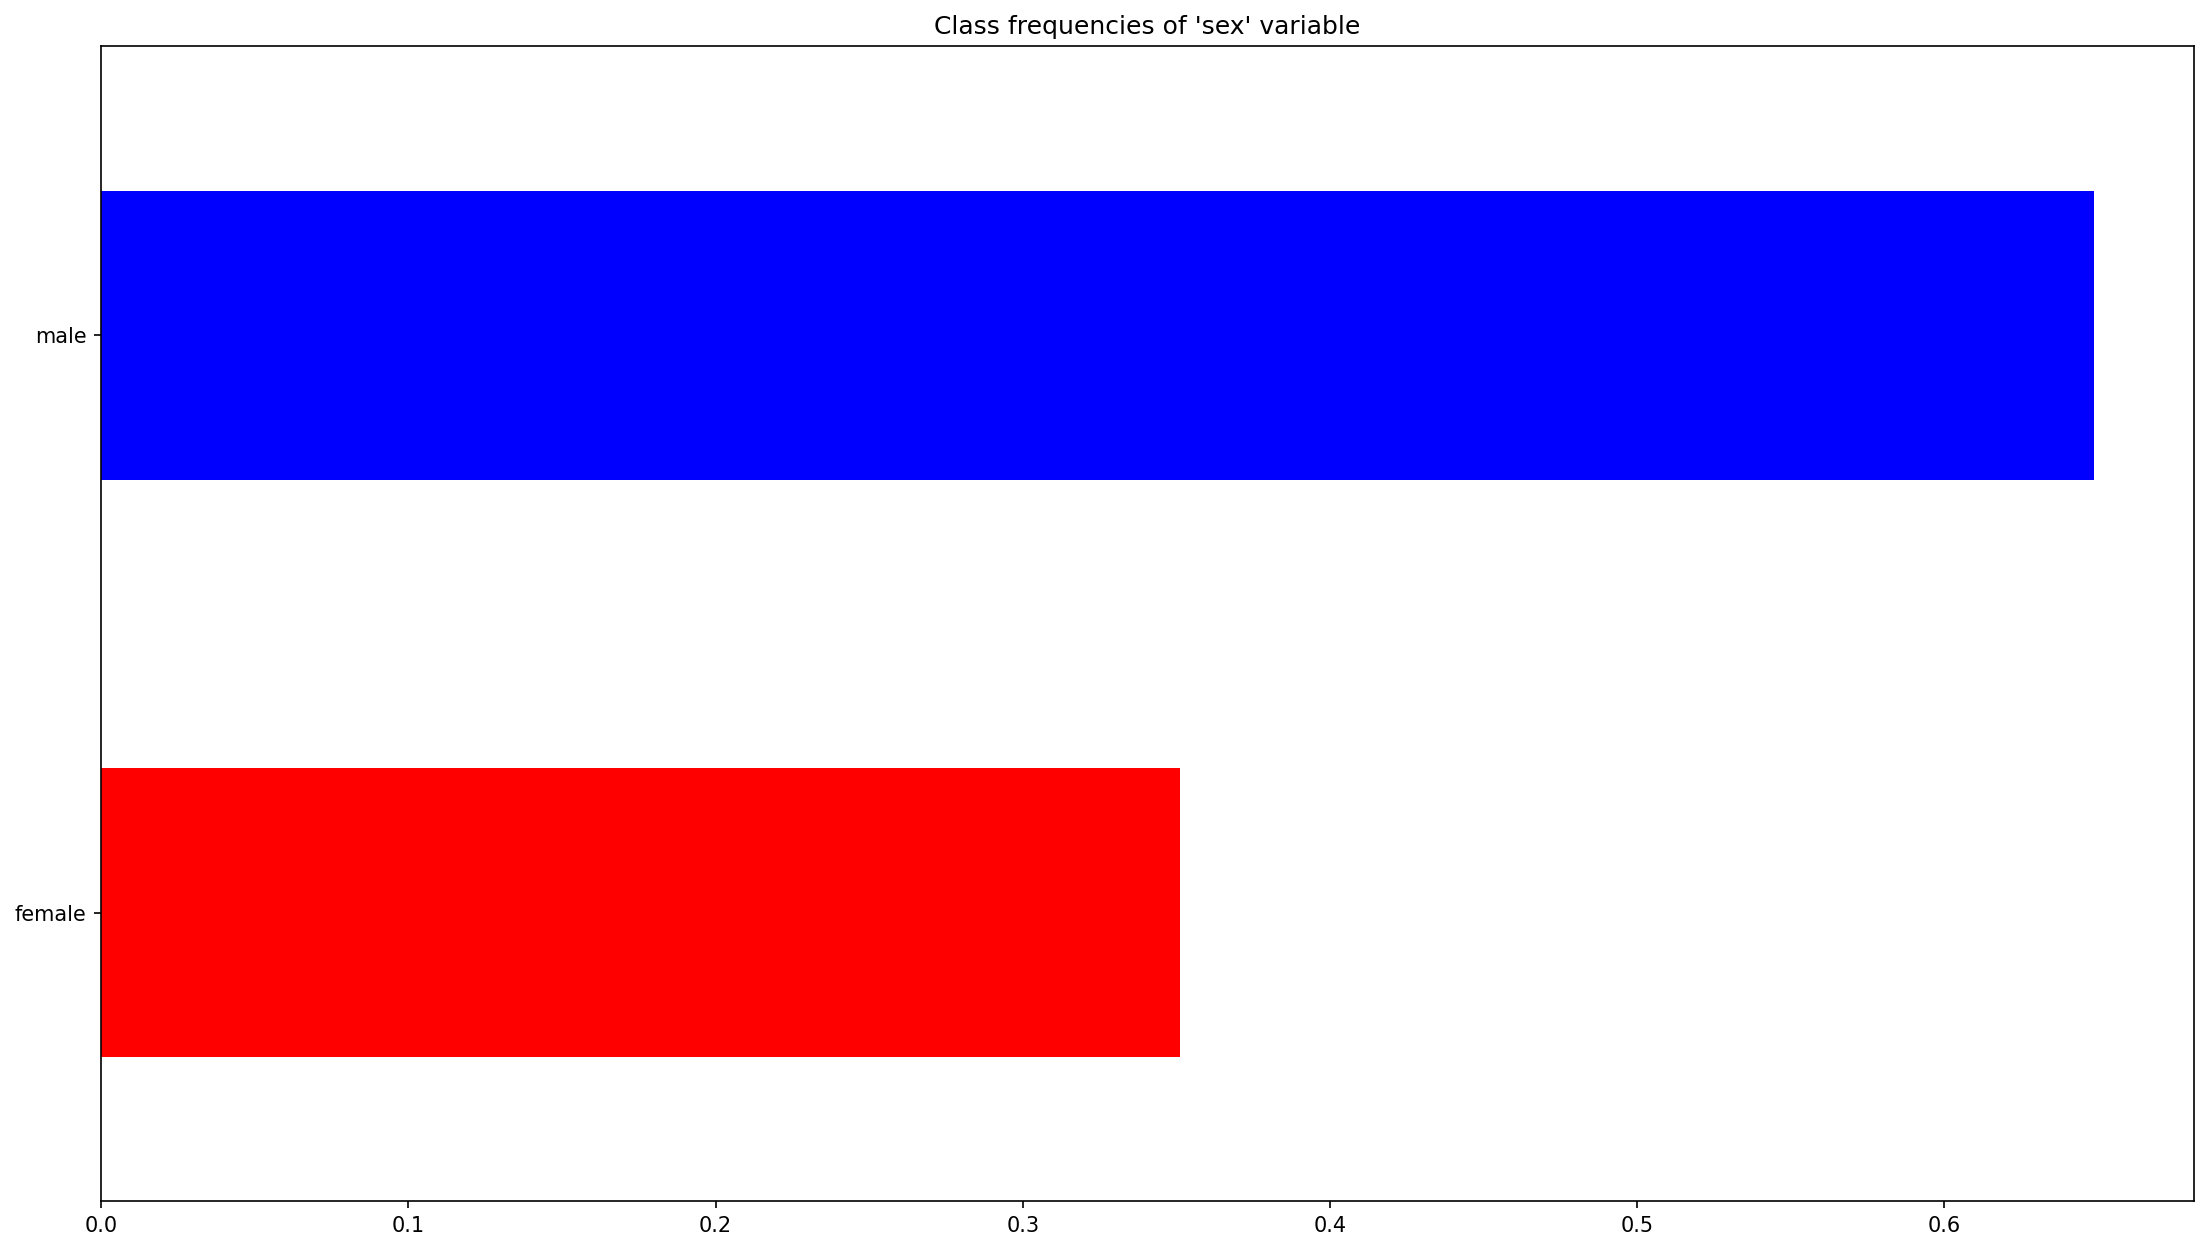

In [54]:
# To show the relationship between categoric variable "sex" and its frequency

plt.figure(figsize=(18, 10), dpi=150, edgecolor="black")

(df_eda["sex"].value_counts(ascending=True, normalize=True)
 .plot.barh(color=["#FF0000", "#0000FF"])
 .set_title("Class frequencies of 'sex' variable"))

plt.savefig("sex_class_frequencies.png", bbox_inches="tight", dpi=150)

# From this graph, it is clear that the number of men in the "sex" variable in the dataset is much more than the number of women

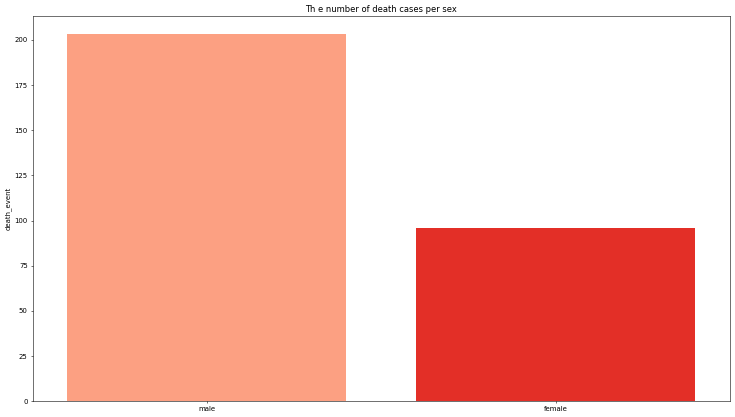

In [29]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(x = df_eda["sex"].value_counts().index,
            y = df_eda["death_event"].value_counts(),
            data = df_eda, palette = "Reds", 
            saturation = 1).set(title = "Th e number of death cases per sex");

# Looking at the values in the graph, it can be seen that the risk of death of men due to heart attack is 2 times
# more than that of women.

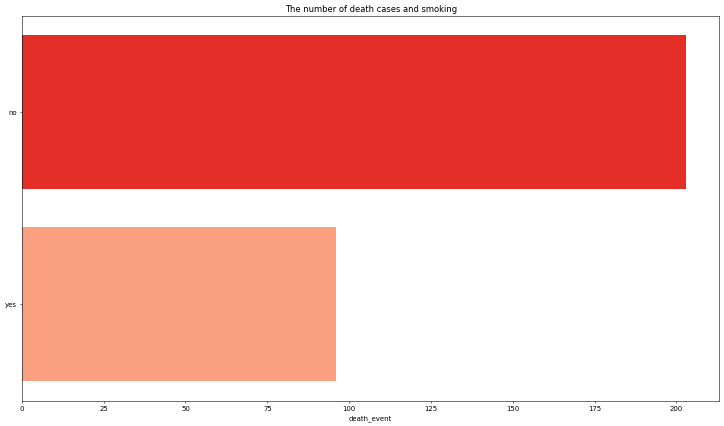

In [30]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(y = df_eda["smoking"].value_counts().index,
            x = df_eda["death_event"].value_counts(),
            data = df_eda, palette = "Reds_r", 
            saturation = 1,
            orient = "h").set(title = "The number of death cases and smoking");

#Looking at the values in the graph,it becomes clear that the mortality rate of smokers 
# is much lower than that of non-smokers. But here we need to be careful,
# as it is known to everyone that under normal circumstances, the death rate of people who smoke is high. 
# Hence the problem here is with our dataset. Because the number of smokers in our dataset is high 
# and the number of deaths is low. So the inconsistency.

### Analysis

In [31]:
from sklearn.preprocessing import StandardScaler #for standardization

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from termcolor import colored

In [32]:
# we select dependent variable (label)
y = df["DEATH_EVENT"]
df1= df.drop('time', axis=1)
# we select independent variable
x = df1.drop("DEATH_EVENT", axis = 1)

print(colored("\n DEPENDENT AND INDEPENDENT VARIABLES WERE SUCCESFULLY SELECTED...", color = "green", attrs = ["bold", "dark"]))


 DEPENDENT AND INDEPENDENT VARIABLES WERE SUCCESFULLY SELECTED...


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)

print(colored("\n THE DATASET WERE SUCCESFULLY SPLITTED - test = 20%, train = 80%...", color = "green", attrs = ["bold", "dark"]))


 THE DATASET WERE SUCCESFULLY SPLITTED - test = 20%, train = 80%...


### Scaling

In [34]:
from imblearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from statsmodels.stats.proportion import proportion_confint


num_att = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
bin_att = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

class DataFrameSelector(BaseEstimator):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_att)),
    ('std_scaler', StandardScaler())
])

bin_pipeline = Pipeline([
    ('selector', DataFrameSelector(bin_att))
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("bin_pipeline", bin_pipeline)
])

X_train_ = full_pipeline.fit_transform(x_train)
X_test_ = full_pipeline.transform(x_test)

### Random Forest

In [35]:
rf = RandomForestClassifier(random_state=42)
#parametres for search
rf_params = {"max_depth": [3, 5, 8, 10],
             "max_features": [3, 5, 8, 10],
             "n_estimators": [10, 100, 500],
             "min_samples_split": [2, 5, 10]}

# Search the best parametres with GridSearchCV() function
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1)
rf_cv_model.fit(X_train_, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10],
                         'max_features': [3, 5, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 500]})

In [36]:
# get the best parametres

rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 5,
 'n_estimators': 500}

In [37]:
rf_model = RandomForestClassifier(n_estimators = rf_cv_model.best_params_["n_estimators"],
                                max_depth = rf_cv_model.best_params_["max_depth"],
                                max_features = rf_cv_model.best_params_["max_features"],
                                min_samples_split = rf_cv_model.best_params_["min_samples_split"])
rf_model.fit(X_train_, y_train)

RandomForestClassifier(max_depth=5, max_features=3, min_samples_split=5,
                       n_estimators=500)

In [38]:
y_predn = rf_model.predict(X_test_)
accuracy_score(y_test, y_predn)

0.8

In [39]:
generate_model_report(y_test, y_predn)

Accuracy =  0.8
Precision =  0.625
Recall =  0.35714285714285715
F1 Score =  0.45454545454545453


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        46
           1       0.20      0.21      0.21        14

    accuracy                           0.62        60
   macro avg       0.48      0.48      0.48        60
weighted avg       0.63      0.62      0.62        60



[[43  3]
 [ 9  5]]


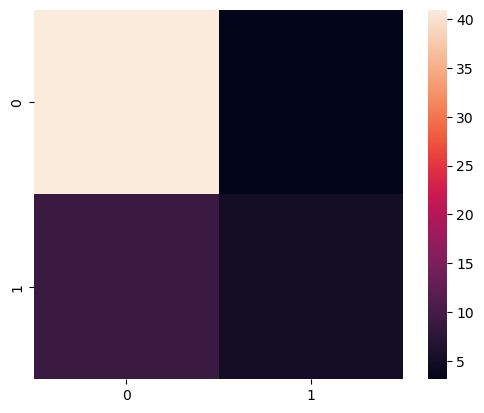

In [41]:
# Visualisation Confusion Matrix
conf_mat = confusion_matrix(y_test, y_predn)
print(conf_mat)

# Visualize it as a heatmap
sns.heatmap(conf_mat, square = True, robust = True)
plt.show()

### Logistic Regression

In [42]:
# build a log_reg model

log = LogisticRegression(solver = "liblinear")
log_model = log.fit(X_train_, y_train)
log_model

LogisticRegression(solver='liblinear')

In [43]:
y_pred = log_model.predict(X_test_)
accuracy_score(y_test, y_pred)

0.8166666666666667

In [55]:
generate_model_report(y_test, y_pred)

Accuracy =  0.8166666666666667
Precision =  0.6666666666666666
Recall =  0.42857142857142855
F1 Score =  0.5217391304347826


### Decision Tree

In [44]:
accuracy_list = []
algorithm = []
predict_list = []

test accuracy:  0.8


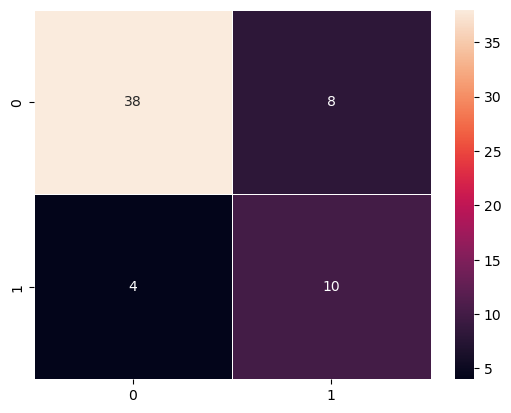

In [51]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_,y_train)
print("test accuracy: ",dt.score(X_test_,y_test))
accuracy_list.append(dt.score(X_test_,y_test))
algorithm.append("Decision Tree Classifier")

cm = confusion_matrix(y_test,dt.predict(X_test_))
predict_list.append(cm.item(0)+cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()

In [57]:
y_predict = dt.predict(X_test_)
generate_model_report(y_test, y_predict)

Accuracy =  0.8
Precision =  0.5555555555555556
Recall =  0.7142857142857143
F1 Score =  0.6250000000000001


### KNN

Best K Value is  {'n_neighbors': 11}
test accuracy  0.8166666666666667


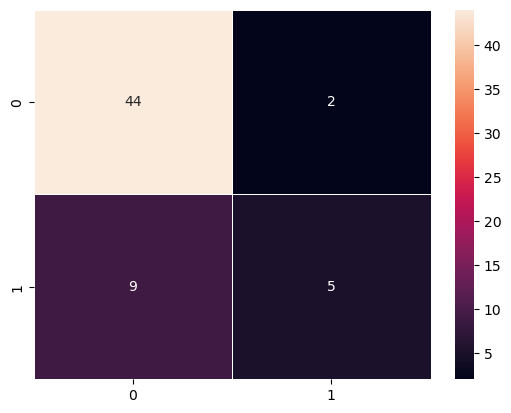

In [46]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=4)
knn_gscv.fit(X_train_, y_train)
print("Best K Value is ",knn_gscv.best_params_)

accuracy_list.append(knn_gscv.score(X_test_,y_test))
print("test accuracy ",knn_gscv.score(X_test_,y_test))
algorithm.append("K Nearest Neighbors Classifier")

cm = confusion_matrix(y_test,knn_gscv.predict(X_test_))
predict_list.append(cm.item(0)+cm.item(2))
sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()